<a href="https://colab.research.google.com/github/suheda1ben/ColabCaseOfStudy/blob/main/SanFrancisco_Airport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [5]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
df["Boarding Area"]=df["Boarding Area"].map({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6})

In [8]:
df["Terminal"]=df["Terminal"].map({"Terminal 1":0,"International":1})

In [9]:
df["Price Category Code"]=df["Price Category Code"].map({"Low Fare":0,"Other":1})

In [10]:
x=df[["Boarding Area","Terminal","Price Category Code","Passenger Count"]]

In [11]:
x.head()

,Boarding Area,Terminal,Price Category Code,Passenger Count
0,1.0,0.0,0,27271
1,1.0,0.0,0,29131
2,1.0,0.0,0,5415
3,1.0,0.0,1,35156
4,1.0,0.0,1,34090


In [12]:
x.isnull().sum()

Boarding Area            27
Terminal               3312
Price Category Code       0
Passenger Count           0
dtype: int64

In [14]:
df["Boarding Area"]=df["Boarding Area"].fillna(df["Boarding Area"].mean())

In [15]:
df["Terminal"]=df["Terminal"].fillna(df["Terminal"].mean())

In [16]:
df["Boarding Area"]=df["Boarding Area"].astype("int64")

In [17]:
df["Terminal"]=df["Terminal"].astype("int64")

In [18]:
x.head()

,Boarding Area,Terminal,Price Category Code,Passenger Count
0,1.0,0.0,0,27271
1,1.0,0.0,0,29131
2,1.0,0.0,0,5415
3,1.0,0.0,1,35156
4,1.0,0.0,1,34090


In [19]:
x=df[["Boarding Area","Terminal","Price Category Code","Passenger Count"]]

In [20]:
model=KMeans(n_clusters=4)

In [21]:
model=model.fit(x)

In [22]:
tahmin=model.predict(x)

In [23]:
tahmin

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [24]:
x["cluster"]=tahmin

In [25]:
x.head()

,Boarding Area,Terminal,Price Category Code,Passenger Count,cluster
0,1,0,0,27271,1
1,1,0,0,29131,1
2,1,0,0,5415,1
3,1,0,1,35156,0
4,1,0,1,34090,1


In [26]:
silhouette_score(x,tahmin)

0.7861678471574051

In [27]:
import matplotlib.pyplot as plt

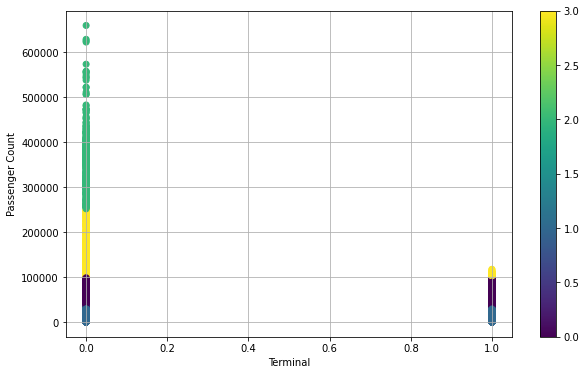

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x["Terminal"],x["Passenger Count"],c=tahmin)
plt.xlabel("Terminal")
plt.ylabel("Passenger Count")
plt.colorbar()
plt.grid()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [29]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster  2  score  0.8596461789731554
Cluster  3  score  0.8285981002496865
Cluster  4  score  0.7862428304421709
Cluster  5  score  0.7846347340610466
Cluster  6  score  0.6632122994960498
Cluster  7  score  0.663818211126197
Cluster  8  score  0.6450715589265975
Cluster  9  score  0.6389282775727998
Cluster  10  score  0.6124771869381997
Cluster  11  score  0.6103657395266362


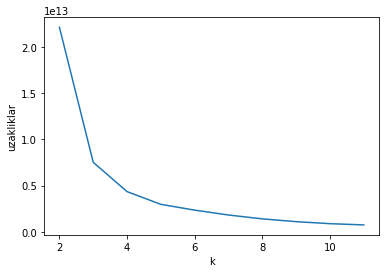

In [30]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar)

In [31]:
df[df["Passenger Count"]>3000]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,0,0,1,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,0,0,1,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,0,0,1,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,1,0,1,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,1,0,1,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18875,201806,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,1,1,0,18279
18878,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,1,1,0,9382
18879,201806,WOW Air,WW,WOW Air,WW,International,Europe,Deplaned,1,1,6,8989
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,1,1,0,10868
